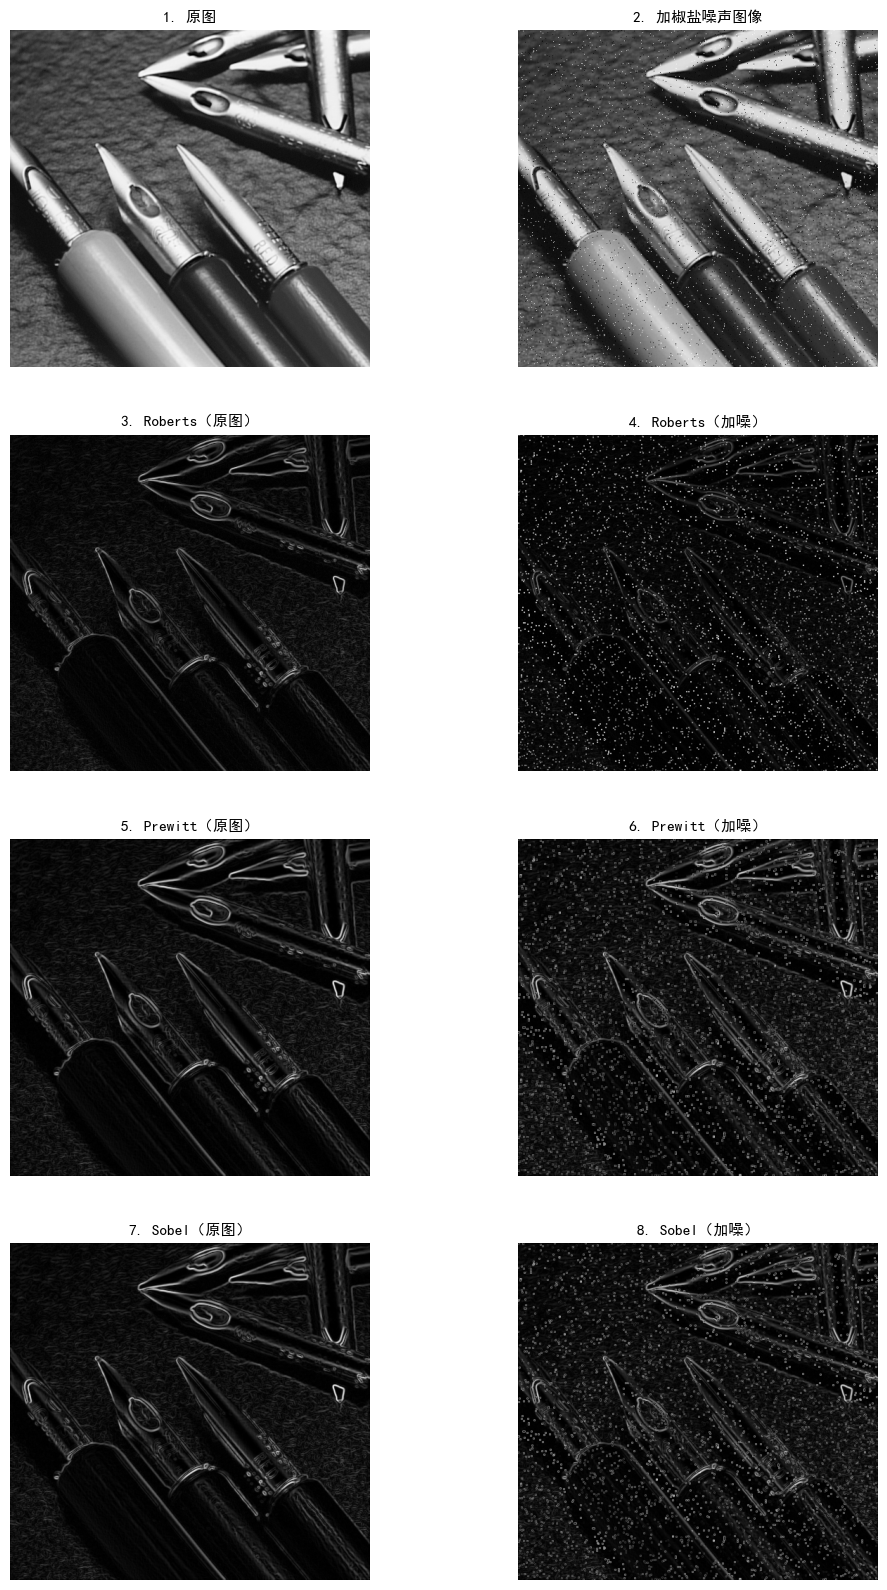

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def add_salt_pepper_noise(img, noise_ratio=0.02):
    noisy_img = img.copy()
    noise_num = int(noise_ratio * img.size)
    for _ in range(noise_num//2):
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        noisy_img[x, y] = 255
    for _ in range(noise_num//2):
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        noisy_img[x, y] = 0
    return noisy_img

def edge_detect_roberts(img):
    """Roberts算子边缘检测"""
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    gx = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    gy = cv2.filter2D(img, cv2.CV_64F, kernel_y)
    edge = np.sqrt(gx**2 + gy**2)
    edge = cv2.normalize(edge, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return edge

def edge_detect_prewitt(img):
    """Prewitt算子边缘检测"""
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
    gx = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    gy = cv2.filter2D(img, cv2.CV_64F, kernel_y)
    edge = np.sqrt(gx**2 + gy**2)
    edge = cv2.normalize(edge, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return edge

def edge_detect_sobel(img):
    """Sobel算子边缘检测"""
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
    gx = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    gy = cv2.filter2D(img, cv2.CV_64F, kernel_y)
    edge = np.sqrt(gx**2 + gy**2)
    edge = cv2.normalize(edge, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return edge

# ---------------------- 2. 图像加载与预处理 ----------------------
# 读取灰度图像（替换为你的图像路径）
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
# 若读取失败，生成500×500的随机灰度测试图
if img is None:
    img = np.random.randint(0, 255, (500, 500), dtype=np.uint8)

# 生成加噪图像（椒盐噪声比例0.02）
img_noisy = add_salt_pepper_noise(img, noise_ratio=0.02)

# ---------------------- 3. 三算子边缘检测 ----------------------
# 原图检测
edge_roberts = edge_detect_roberts(img)
edge_prewitt = edge_detect_prewitt(img)
edge_sobel = edge_detect_sobel(img)

# 加噪图检测
edge_roberts_noisy = edge_detect_roberts(img_noisy)
edge_prewitt_noisy = edge_detect_prewitt(img_noisy)
edge_sobel_noisy = edge_detect_sobel(img_noisy)

# ---------------------- 4. 可视化对比（4×2竖版布局） ----------------------
plt.figure(figsize=(10, 16))

plt.subplot(4, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('1. 原图', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(img_noisy, cmap='gray')
plt.title('2. 加椒盐噪声图像', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(edge_roberts, cmap='gray')
plt.title('3. Roberts（原图）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(edge_roberts_noisy, cmap='gray')
plt.title('4. Roberts（加噪）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 5)
plt.imshow(edge_prewitt, cmap='gray')
plt.title('5. Prewitt（原图）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(edge_prewitt_noisy, cmap='gray')
plt.title('6. Prewitt（加噪）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 7)
plt.imshow(edge_sobel, cmap='gray')
plt.title('7. Sobel（原图）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(edge_sobel_noisy, cmap='gray')
plt.title('8. Sobel（加噪）', fontsize=11)
plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()